#    미국 주와 주별 인구 데이타 예제 
     - 2010년도 인구 밀도 기준으로 미국 주와 지역 순위를 출력
 
1. 데이타를 로딩 후 데이타 정보 확인


2. 데이타 연결
        1- 인구 데이타와 주이름 약어 데이타를 연결
            ( 각 주의 전체 이름과 인구를 볼 수 있도록 )
            
        2- 각 주의 인구 데이타와 면적 데이타를 연결
            ( 각 주의 면적당 인구를 계산하여 인구 밀도를 구하기 )
            
3. 데이타 정제(데이타 전처리)
     * 누락값 처리
        1. 삭제한다
        2. 대체한다
    
    실제로 2000년 이전의 PR(푸에르토리토)의 인구 데이타가 없는 것이다.
    여기서는 2010년 데이타를 구할 것이기에 삭제해도 되지만 대체하는 방식을 연습한다
    또한 전체 미국을 뜻하는 USA에 state와 abbreviation이 없다.
 
 
4. 2010년 인구밀도 계산하고 표현
        인구밀도 = 인구 / 면적
        

 
    [도서] 파이썬 데이타 사이언스 핸드북 - 위키북스/오렐리

---
## 1. 데이타를 로딩 후 데이타 정보 확인

In [60]:
# 1. 데이타를 로딩 후 데이타 정보 확인
import pandas as pd
import matplotlib.pyplot as plt
pop = pd.read_csv('./data/state-population.csv')    # 주별 인구
areas = pd.read_csv('./data/state-areas.csv')       # 주의 면적
abbrevs = pd.read_csv('./data/state-abbrevs.csv')   # 주이름 약자

# 데이타 살펴보기
pop
areas
abbrevs
# 행수 확인
#len(pop)
#len(areas)
#len(abbrevs)
#set(pop['state/region'].values)
areas

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


---
## 2. 데이타 연결
        
    1- 인구 데이타(pop)와 주이름 약어 데이타(abbrevs)를 연결
            ( 각 주의 전체 이름과 인구를 볼 수 있도록 )
    2- 각 주의 인구 데이타(pop)와 면적 데이타(areas)를 연결
            ( 각 주의 면적당 인구를 계산하여 인구 밀도를 구하기 )



In [61]:
temp1 = pd.merge(pop, abbrevs, left_on='state/region', right_on='abbreviation')
data = pd.merge(temp1, areas, left_on='state', right_on='state')
data['p/a']=data['population']/temp2['area (sq. mi)']
data

,state/region,ages,year,population,state,abbreviation,area (sq. mi),p/a
0,AL,under18,2012,1117489.0,Alabama,AL,52423,21.316769
1,AL,total,2012,4817528.0,Alabama,AL,52423,91.897221
2,AL,under18,2010,1130966.0,Alabama,AL,52423,21.573851
3,AL,total,2010,4785570.0,Alabama,AL,52423,91.287603
4,AL,under18,2011,1125763.0,Alabama,AL,52423,21.474601
...,...,...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,WY,97818,1.405242
2444,WY,total,1991,459260.0,Wyoming,WY,97818,4.695046
2445,WY,under18,1991,136720.0,Wyoming,WY,97818,1.397698
2446,WY,under18,1990,136078.0,Wyoming,WY,97818,1.391135


---
##  3. 데이타 정제 -    누락값 처리

        (1) 삭제한다
        (2) 대체한다
    
    실제로 2000년 이전의 PR(푸에르토리토)의 인구 데이타가 없는 것이다.
    여기서는 2010년 데이타를 구할 것이기에 삭제해도 되지만 대체하는 방식을 연습한다
    또한 전체 미국을 뜻하는 USA에 state와 abbreviation이 없다.


state/region     0
ages             0
year             0
population       0
state            0
abbreviation     0
area (sq. mi)    0
p/a              0
dtype: int64

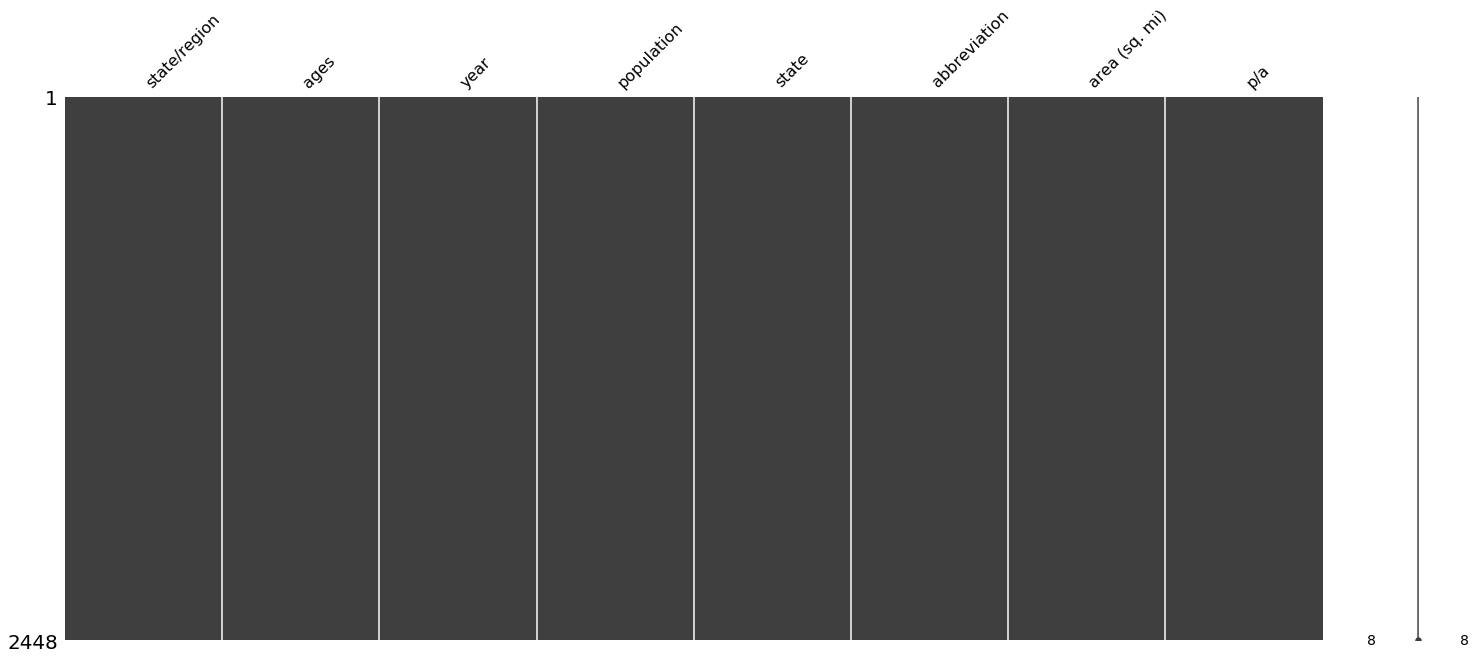

In [62]:
#!pip install missingno
# (1) null 값 확인
import missingno as msno
msno.matrix(data) # 하얀색이 null값

data.shape[0] - data.count()
#temp2.shape
# (2) 우선 state 컬럼의 null 처리


## 4. 각 주의 인구를 연결한 데이타셋에 주의 면적 데이타 셋을 연결하기 

(merge이용)


#### 1- pop과 abbreviation의 연결한 데이타셋과 areas(면적) 데이타셋을 연결

#### 2-널 값 여부 확인

#### 3- 널값 확인

#### 4- 널값 처리 : 데이타 삭제하기
    미국 전역에 대한 데이타는 인구 밀도와 관련이 없기에 삭제
    
#### 5- 면적이 null 값이 있는지 없는지 확인    

In [63]:
# 각 주의 인구를 연결한 데이타셋에 주의 면적 데이타 셋을 연결하기

# 1- pop과 abbreviation의 연결한 데이타셋과 areas(면적) 데이타셋을 연결

# 2-널 값 여부 확인

# 3- 널값 확인 : 면적값이 널인 주를 찾으면


state/region     0
ages             0
year             0
population       0
state            0
abbreviation     0
area (sq. mi)    0
p/a              0
dtype: int64

In [64]:
# 4- 널값 처리 : 데이타 삭제하기
# 미국 전역에 대한 데이타는 인구 밀도와 관련이 없기에 삭제


In [65]:
# 5- [결과확인] 면적이 null 값이 있는지 없는지 확인


## 2010년 인구밀도 계산하고 표현
        
        
    인구밀도 = 인구 / 면적
        
    필요한 데이타는 2010년 전체 인구에 대한 데이타집합이다.


In [66]:
'''

# 필요한 데이타집합 추출
data = finalmerged[finalmerged['year']==2010]
data = data[finalmerged['ages']=='total']
# print(data)

# 주(state)를 기준으로 데이타 인덱스를 정하고 인구밀도 계산
data.set_index('state', inplace=True)
# print(data)


density = data['population']/data['area (sq. mi)']
density

density.sort_values(ascending=False, inplace=True)
print(density)  
'''

"\n\n# 필요한 데이타집합 추출\ndata = finalmerged[finalmerged['year']==2010]\ndata = data[finalmerged['ages']=='total']\n# print(data)\n\n# 주(state)를 기준으로 데이타 인덱스를 정하고 인구밀도 계산\ndata.set_index('state', inplace=True)\n# print(data)\n\n\ndensity = data['population']/data['area (sq. mi)']\ndensity\n\ndensity.sort_values(ascending=False, inplace=True)\nprint(density)  \n"

### [결과] 

        state
        District of Columbia    8898.897059
        New Jersey              1009.253268
        Rhode Island             681.339159
        Connecticut              645.600649
        Massachusetts            621.815538
        Maryland                 466.445797
        Delaware                 460.445752
        New York                 356.094135
        Florida                  286.597129
        Pennsylvania             275.966651
        Ohio                     257.549634
        California               228.051342
        Illinois                 221.687472
        Virginia                 187.622273
        Indiana                  178.197831
        North Carolina           177.617157
        Georgia                  163.409902
        Tennessee                150.825298
        South Carolina           144.854594
        New Hampshire            140.799273
        Hawaii                   124.746707
        Kentucky                 107.586994
        Michigan                 102.015794
        Washington                94.557817
        Texas                     93.987655
        Alabama                   91.287603
        Louisiana                 87.676099
        Wisconsin                 86.851900
        Missouri                  86.015622
        West Virginia             76.519582
        Vermont                   65.085075
        Mississippi               61.321530
        Minnesota                 61.078373
        Arizona                   56.214497
        Arkansas                  54.948667
        Iowa                      54.202751
        Oklahoma                  53.778278
        Colorado                  48.493718
        Oregon                    39.001565
        Maine                     37.509990
        Kansas                    34.745266
        Utah                      32.677188
        Nevada                    24.448796
        Nebraska                  23.654153
        Idaho                     18.794338
        New Mexico                16.982737
        South Dakota              10.583512
        North Dakota               9.537565
        Montana                    6.736171
        Wyoming                    5.768079
        Alaska                     1.087509


---


  [분석결과]
  
  인구 밀도가 가장 높은 주는 District of Columbia(DC) 워싱톤DC 이고
  그 다음은 Puerto Rico 이다.
  
  인구 밀도가 가장 작은 Alaska는 1제곱마일당 평균 주민수가 1만명정도이다.
  
  [시각화작업]
